# Stochastic Gradient Descent vs Batch GD vs Sklearn's OLS

# Objective:

1) **To implement Stochastic Gradient Descent (SGD)** based on how the gradient descent logic works, to minimize the cost so as to find the best fit. 

2) Compare and analyse the difference in outcome between **self implementation of SGD vs sklearn's Ordinary Least Squares (OLS)** implementation. You may use graphical plots to do the same.

3) **Implement Batch Gradient Descent** to compare the outcome: **both timing as well as data.**



# At a glance

a) **Stochastic Gradient Descent (SGD**) is implemented and cost analysis has been down for every 100 iterations. It **has been tested for different batch sizes & iterations, to find out difference in RMSE, graphically depicted using scatter plots.** The formulas used in SGD implementation is given in the report below.

b) **Sklearn's Ordinary Least Squares (OLS) is used on the same dataset and timing and error evaluation has been done** for head to head comparison. **Batch Gradient Descent algorithm** is also implemented for comparison.

c) The **timing comparison of all the 4 methods**: Batch Gradient Descent, Stochastic GD, low K SGD and Sklearn's OLS **has been done. The PDF of errors is plotted with kdeplot** to identify the deviation of distribution from actual target value distribution. **The summary of results and conclusion is provided at the end of the report.**

# Data Source: 

    Boston Dataset from Sklearn Datasets.

# Loading and Analyzing the Data

In [178]:
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [179]:
print(boston.data.shape)

(506, 13)


In [180]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [181]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [182]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


# Data Preprocessing & Train/ Test Slicing

In [183]:
# used to format headings 
bold = '\033[1m'
end = '\033[0m'

bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [184]:
import sklearn
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
                                        X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


# Batch Gradient Descent Implementation

In [185]:
# source: https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0
# Modified the code to suit for multidimensional X for training & MSE calculation.

def linear_regression(X, y, m_current=0, b_current=0, 
                      epochs=1000, learning_rate=0.0001, verbose=True):
    
    N = float(len(y))
    featureLength = X.shape[1]
    m_current = np.random.randn(featureLength)
    
    if verbose:
        print (bold + '\nBatch Gradient Descent: Cost Analysis' + end)
        
    for i in range(epochs):
 
        y_current = np.matmul(X, m_current) + b_current

        cost = sum([data**2 for data in (y-y_current)]) / N
    
        if verbose and (i+1) % 100 == 0:
            print("Iteration #" + str(i+1) + " Cost\t= " + str(round(cost, 2)))
        
        m_gradient = -(2/N) * sum(X * (y - y_current)[:, np.newaxis])
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
        # learning_rate /= 2
        
    return m_current, b_current, cost

# Hand Coding of Stochastic Gradient Descent

The error is calculated using the below formula at every iteration.
<img src="error.png" alt="Error Formula" style="width: 300px;"/>

The derivative term, w.r.t. w and b has to be negated on every iteration. Derivate is calculated using this formula at every iteration.
<img src="gradient.png" alt="Gradient w.r.t. w and b" style="width: 300px;"/>

Then we negate the parameter gradient from each parameter, adjusted by learning rate. We use this formula, params = params - learning rate * params_gradient.
<img src="update_eq.png" alt="Update Equation" style="width: 150px;"/>

In [186]:
# To implement Stochastic Gradient Descent using own logic.
from random import randint
import numpy as np
import matplotlib.pyplot as plt

# Implementation of SGD Logic
# k is the number of random points in each iteration
# k should be less than train size.
def ownLinearReg(X_train, Y_train, k = 10, iterations = 1000, verbose = True):
    
    r = 0.1 # set r as 1 and make half on each iteration
    trainRows = len(X_train)
    featureLength = X_train.shape[1]
    
    # Randomly initialize w & b generating each component 
    # of the vector w_1 from Normal(0,1). 
    # Shape of w vector = shape of randomTrain vector

    # To generate random numbers of normal distribution 
    # N (std, mu) = std * np.random.randn(x, y)) + mu
    w = np.random.randn(featureLength) # N(0, 1)
    b = 0 #np.random.randn(k) # N(0, 1)
    
    if verbose:
        if k < 10:
            print (bold + 'Low K, Stochastic Gradient Descent: Cost Analysis' + end)
        else:
            print (bold + 'Stochastic Gradient Descent: Cost Analysis' + end)
    
    for i in range(iterations):

        # Pick k random points from training set to make GD as SGD
        randomSample = np.random.randint(trainRows, size=(k))

        # select random points based on random indices
        sampledTrain_X = X_train.iloc[randomSample]
        sampledTrain_Y = Y_train.iloc[randomSample]

        sampleSize = sampledTrain_X.size

        # (y - wTx - b) is common for both partial differentials, w.r.t. w and b
        error_term = sampledTrain_Y - np.matmul(sampledTrain_X,w) - b
        
        cost = sum([data**2 for data in error_term]) / k
        
        if verbose and (i+1) % 100 == 0:
            print("Cost of iteration #" + str(i+1) + "\t= " + str(round(cost,2)))
            
        # differential w.r.t. b
        # df.values will convert dataframe to ndarray for row-wise mult
        # np.newaxis converts each element of 1xn matrix as a row along new axis
        partial_diff_w = -2 * sampledTrain_X.values * error_term[:, np.newaxis]

        # differential w.r.t. b
        partial_diff_b = -2*error_term

        w = w - r*sum(partial_diff_w)/k
        b = b - r*sum(partial_diff_b)/k

        # r /= 2
    
    return w, b, cost


In [187]:
# To calculate y based on weight vector, w and b
def ownPredict(X_test, w, b):
    
    return np.matmul(X_test,w) + b

Low K, Stochastic Gradient Descent: Cost Analysis
Cost of iteration #100	= 72.81
Cost of iteration #200	= 59.0
Cost of iteration #300	= 159.28
Cost of iteration #400	= 17.85
Cost of iteration #500	= 1934.25
Cost of iteration #600	= 30.67
Cost of iteration #700	= 394.6
Cost of iteration #800	= 575.87
Cost of iteration #900	= 11.97
Cost of iteration #1000	= 98.75
Cost of iteration #1100	= 190.68
Cost of iteration #1200	= 13.14
Cost of iteration #1300	= 7.5
Cost of iteration #1400	= 85.12
Cost of iteration #1500	= 49.15
Cost of iteration #1600	= 54.78
Cost of iteration #1700	= 10.78
Cost of iteration #1800	= 10.68
Cost of iteration #1900	= 30.55
Cost of iteration #2000	= 123.18
Stochastic Gradient Descent: Cost Analysis
Cost of iteration #100	= 14.76
Cost of iteration #200	= 52.03
Cost of iteration #300	= 232.23
Cost of iteration #400	= 31.24
Cost of iteration #500	= 15.02
Cost of iteration #600	= 4.38
Cost of iteration #700	= 24.46
Cost of iteration #800	= 22.23
Cost of iteration #900	= 

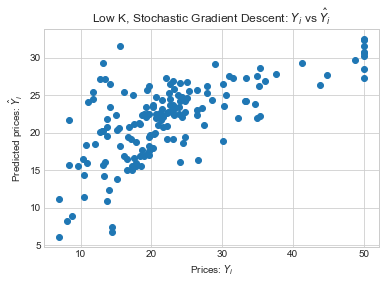

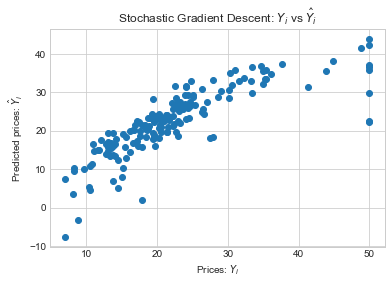

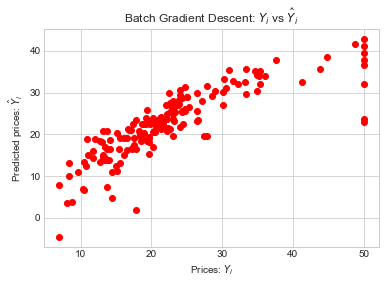

In [188]:
# Main function to call self coded SGD and predict based on fit params.
# Root Mean Square Error is also calculated for each method.
import math as m
from sklearn.preprocessing import StandardScaler

# Standardisation. Set "with_mean=False" to preserve sparsity
scaler = StandardScaler(copy=False).fit(X_train)  
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

# Just to test SGD with low K values
# iterations are increased to account for the low k
w_sgd_lowK, b_sgd_lowK, cost_sgd_lowK = ownLinearReg(
                        pd.DataFrame(X_train), Y_train, k = 5, iterations = 2000)

# Stochastic Gradient Descent
w_sgd, b_sgd, cost_sgd = ownLinearReg(
                        pd.DataFrame(X_train), Y_train, k = 10, iterations = 1000)
      
# Batch Gradient Descent
w_gd, b_gd, cost_gd = linear_regression(X_train, Y_train, 
                        m_current=0, b_current=0, epochs=1000, learning_rate=0.1)

print("\n\nRMSE LowK SGD \t= " + str(round(m.sqrt(cost_sgd_lowK), 2)))
print("RMSE of SGD \t= " + str(round(m.sqrt(cost_sgd), 2)))
print("RMSE of GD \t= " + str(round(m.sqrt(cost_gd), 2)))

# To calculate the % change in W between GD and SGD
distChange = np.linalg.norm(w_gd-w_sgd)/np.linalg.norm(w_gd)
print("\nPercentage change in Weight Vectors from GD to SGD = " 
                                          + str(round(distChange,2))+ "%")

Y_pred_sgd_lowK = ownPredict(X_test, w_sgd_lowK, b_sgd_lowK)

plt.scatter(Y_test, Y_pred_sgd_lowK)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Low K, Stochastic Gradient Descent: $Y_i$ vs $\hat{Y}_i$")
plt.show()

Y_pred_sgd = ownPredict(X_test, w_sgd, b_sgd)

plt.scatter(Y_test, Y_pred_sgd)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Stochastic Gradient Descent: $Y_i$ vs $\hat{Y}_i$")
plt.show()

Y_pred_gd = ownPredict(X_test, w_gd, b_gd)

plt.scatter(Y_test, Y_pred_gd, c='r')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Batch Gradient Descent: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Linear Regression using Sklearn's OLS

RMSE = 5.31


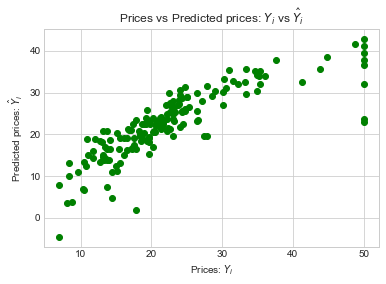

In [189]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardisation. Set "with_mean=False" to preserve sparsity
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# # Standardisation. Set "with_mean=False" to preserve sparsity
# scaler = StandardScaler().fit(X_test)
# X_test = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

print("RMSE = " + str(round(m.sqrt(mean_squared_error(Y_test, Y_pred)), 2)))

plt.scatter(Y_test, Y_pred, c='g')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Comparison of SGD vs Batch GD vs Sklearn's OLS for LR

## Timing Comparison of SGD, Batch GD, SKlearn & Low K SGD

In [196]:
import time

# Just to test SGD with low K values
# iterations are increased to account for the low k
start_time = time.time()
ownLinearReg(pd.DataFrame(X_train), Y_train, 
                 k = 5, iterations = 1000, verbose=False)

print("\nTime Taken by Low K SGD is {} seconds when k = {}"
                  .format(round(time.time() - start_time, 2), 5))

# Stochastic Gradient Descent
start_time = time.time()
ownLinearReg(pd.DataFrame(X_train), Y_train, 
                         k = 10, iterations = 1000, verbose=False)
      
print("\nTime Taken by SGD is {} seconds when k = {}" \
                    .format(round(time.time() - start_time, 2), 10))
      
# Batch Gradient Descent
start_time = time.time()
linear_regression(X_train, Y_train, m_current=0, b_current=0, 
                    epochs=1000, learning_rate=0.1, verbose=False)

print("\nTime Taken by Batch GD is {} seconds when k = {}" \
                  .format(round(time.time() - start_time, 2), X_train.shape[0]))

# Sklearn's OLS
start_time = time.time()
lm = LinearRegression()
lm.fit(X_train, Y_train)
print("\nTime Taken by Sklearn OLS is {} seconds".format(time.time() - start_time))


Time Taken by Low K SGD is 1.68 seconds when k = 5

Time Taken by SGD is 1.75 seconds when k = 10

Time Taken by Batch GD is 1.96 seconds when k = 339

Time Taken by Sklearn OLS is 0.0 seconds


## Error Comparison of SGD, Batch GD & Sklearn's OLS

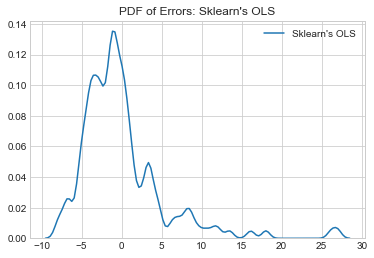

In [191]:
# To plot the distribution of Errors of Sklearn OLS
import seaborn as sns;
import numpy as np;

# Calculate the errors
delta_y = Y_test - Y_pred;

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5, label="Sklearn's OLS")
plt.title('PDF of Errors: Sklearn\'s OLS')
plt.legend()
plt.show()


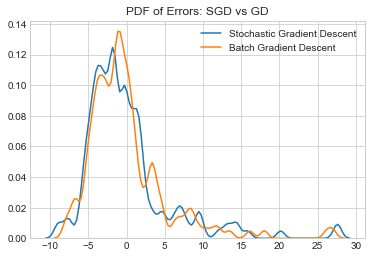

In [192]:
# To plot the distribution of Errors  of SGD and Batch GD self implementation.
import seaborn as sns;
import numpy as np;

# Calculate the errors
delta_y_sgd = Y_test - Y_pred_sgd;
delta_y_gd = Y_test - Y_pred_gd;

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y_sgd), bw=0.5, label="Stochastic Gradient Descent")
sns.kdeplot(np.array(delta_y_gd), bw=0.5, label="Batch Gradient Descent")
plt.legend()
plt.title('PDF of Errors: SGD vs GD')
plt.show()


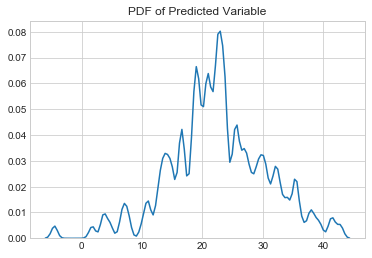

In [203]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.title('PDF of Predicted Variable')
plt.show()

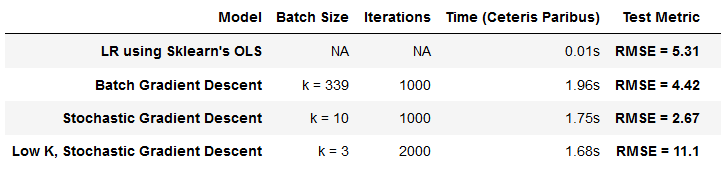

In [197]:
from IPython.display import Image
Image(filename='summary.png') 

# Conclusion

1. The **scatter plot of Stochastic Gradient Descent and Batch Gradient Descent prediction results shows very similar pattern. RMSE values are also almost the same.** Hence, the  stochastic variation of gradient descent yields a decent approximation of batch GD, which takes in, all data points in each iteration.

2. **RMSE of Stochastic Gradient Descent is found to be the lowest** compared to other algorithms. The RMSE value would fluctuate a bit because the algorithm is inherently stochastic. But, the low RMSE values signifies performance of SGD is acceptable.

3. **RMSE of SGD < Batch GD < Sklearn's OLS < Low K SGD**. The low batch size increases the error value significantly. 

4. **Time taken for Sklearn's OLS is very less but its RMSE value is higher. There is significant reduction in time, when we do Stochastic GD instead of Batch GD.**

5. The **scatter plot of Low K SGD is more perturbed than SGD scatter plot.** SGD plot is more linear which signifies less deviation/ error.

6. When k is low (we have taken k= 5), then the minimized MSE is found to be high. But when we increase iterations, the minimum cost moves towards optimum. Hence, **for lower K, iterations should be more.**

7. The PDF of errors in Sklearn's OLS are centered around 0. From the plot, it is noticed that there are more errors on the -ve side. To improve the solution, we have to reduce the errors on the -ve side.

8. The PDF of predicted values are centered around 20. **As the error PDF is much to the left of predicted PDF, it is found that the % of errors is acceptable.**

9. The PDF of errors of Batch Gradient Descent is similar to the Sklearn's OLS method. Hence, the error in fit should be almost same. However, **the PDF error plot of SGD implementation is way off on the negative side, hence errors are more. **

10. The error distribution kdeplot of SGD implementation would become near to Sklean's method when the batch size(k) of SGD implementation increases. As we take more points in each iteration, the approximation error would reduce, though it would take more time.
